In [1]:
!pip install pymystem3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize
from pymystem3.mystem import Mystem
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import rcParams
from joblib import load

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

import warnings 
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 500

In [3]:
def predict(X_test): # X_test: str
    X_test = " ".join(list(filter(lambda x: len(x) > 2, lemmatizer.lemmatize(X_test))))
    embedding = tfid.transform([X_test])
    similarity_matrix = cosine_similarity(embedding, embeddings)
    return df.iloc[np.argsort(similarity_matrix)[:, ::-1][0]].index

In [4]:
PATH = '../input'
tfid = load(PATH + '/tfidf-new/tfid_new.joblib')
df = pd.read_csv(PATH + "/cleandata/clean_data.csv")
tfid = TfidfVectorizer()
embeddings = tfid.fit_transform(df["product_characteristics"].values)
lemmatizer = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [5]:
df.head()

,product_name,product_msr,product_characteristics,okpd2_code,okpd2_name,inn,country_code,new_price
0,"Мешки для мусора 240 л, черные, ПВД, 100 мкм, ...",Штука,объем вид материал пвд длина количество упаков...,22.22.1,Изделия пластмассовые упаковочные,8862f4d4ee368febd5fac195c84f8dde,NaN,29.064
1,Степ платформа,Штука,описание степ платформа вид товар спортивный с...,32.30.14.129,"Оборудование для занятий физкультурой, гимнаст...",605fc8ce2b603efc77cefa563781105f,156.0,4340.980
2,Скобы для степлера,Штука,описание скоба для степлер количество упаковка...,25.99.23.000,"Детали для скоросшивателей или папок, канцеляр...",766fe416835260900f67379de663439c,NaN,114.000
3,"Эмаль Vika МЛ-1110 Апельсин Камаз 0,8 кг",Штука,тип краска однокомпонентный синтетический эмал...,29.32.30.390,Части и принадлежности для автотранспортных ср...,71b52ca820c667fb8cebd3fcf362ac79,643.0,709.000
4,Средство дезинфицирующее Део-бактер 1л,Флакон,объем действующий вещество час алкилдеметилбен...,20.20.14.000,Средства дезинфекционные,c2c3bea3f9fe8262cea420f1b6d3772b,NaN,598.800


In [9]:
X_test = 'мягкие игрушки для детей от трёх лет'
idxs = predict(X_test)
data = df.iloc[idxs].head(1000)
print("Товары-аналоги")
data

Товары-аналоги


,product_name,product_msr,product_characteristics,okpd2_code,okpd2_name,inn,country_code,new_price
15935,Музыкальный паровозик Три Кота,Штука,размер игрушка вид продукция товар вид товар т...,32.40.39.290,"Игрушки прочие, не включенные в другие группир...",6aca51cb6cc78bb8d09c0d7b2b511b55,156.0,915.0
112421,Мяч мягкий «Белка» 15 см,Штука,вид игрушка игровой оборудование игрушка спорт...,32.40.39.129,"Игрушки в наборах или комплектах прочие, не вк...",fbd32069dfa151d4f7559c83b62cadfc,156.0,699.0
175577,Мягкий модуль Бревно,Штука,описание мягкий модуль бревно материал пвх исп...,32.40.39.290,"Игрушки прочие, не включенные в другие группир...",1b1bb3f24095753a93b217a979eb23a8,643.0,20196.0
256,Игрушка «Неваляшка» в художественной упаковке,Штука,возраст год упаковка коробка окошко материал п...,32.40.39.129,"Игрушки в наборах или комплектах прочие, не вк...",6aca51cb6cc78bb8d09c0d7b2b511b55,643.0,371.0
124920,Пазл в рамке,Штука,вид товар для ребенок игрушка игровой оборудов...,32.40.39.129,"Игрушки в наборах или комплектах прочие, не вк...",6aca51cb6cc78bb8d09c0d7b2b511b55,156.0,269.0
...,...,...,...,...,...,...,...,...
43922,Магнитная игра «Яблоня – Времена года»,Штука,состав набор входить деталь для сборка объемны...,32.40.39.129,"Игрушки в наборах или комплектах прочие, не вк...",84f5393e9f48e73c60539f4584c2131f,643.0,3225.0
8360,Игровой набор Цветочная галактика. Планета Сла...,Штука,комплект входить основание штука стебель лист ...,32.40.39.129,"Игрушки в наборах или комплектах прочие, не вк...",20c37738f2038ab0ed4cb447f5ad126d,643.0,720.0
106039,Пирамидка Яркая и веселая,Штука,вид продукция товар состав набор входить стерж...,32.40.39.194,Игрушки пластмассовые для детей ясельного возр...,6aca51cb6cc78bb8d09c0d7b2b511b55,643.0,199.0
164385,Танк с зениткой,Штука,цвет темно зеленый вид игрушка игровой оборудо...,32.40.39.240,Игрушки деревянные прочие,33ccc8f0c453e2f00b848e8a553a5735,643.0,548.0


In [10]:
def draw_distribution(okpd_codes, data, inn, own_okpd_code):
    """
    okpd_codes: list['str'] -> Топ 3 ОКПД в сформированном датасете
    data: pd.DataFrame -> датасет из модели
    inn: str -> инн поставщика (наше инн)
    own_okpd_code: интерусуюищий нас ОКПД (наш ОКПД)
    """
    f, ax = plt.subplots(1, 1)
            
    # формируем данные , в которые входят выбранные категории
    data = data.loc[[True if okpd_name in okpd_codes else False for okpd_name in data['okpd2_code'].values]]
    sns.kdeplot(data=data, x="new_price", hue="okpd2_code", ax=ax)
    
    # находим среднюю цену товара нашей категории
    okpd_to_mean_price = df.loc[df['inn']== inn].groupby(['okpd2_code']).agg({'new_price':'mean'}).reset_index()
    mean_price_inn = okpd_to_mean_price.loc[okpd_to_mean_price['okpd2_code'] == own_okpd_code]['new_price'].values[0]
    
    print(f"Средняя цена ({own_okpd_code}) среди всех данных = {mean_price_inn}")
    
    # Рисуем среднюю цену по нашей категории
    ax.axvline(mean_price_inn, 0, 1, color='red', label=mean_price_inn)
    plt.show()

In [11]:
# Поставщик будет вводить свою категорию сам (на выбор или нет)
def draw_analyst(data, inn, own_okpd_code):
    """
    own_okpd_code: str -> окпд для нахождения распределения между всех транзакций и нашими транзакциями
    """
    if inn != "":
        okpd_codes = uniq_okpd_codes_count.okpd2_code[:3].values
        draw_distribution(okpd_codes, data, inn, own_okpd_code)

In [12]:
top = 4
# Cамые часто встречающиеся ОКПД (категории) и их количество в рекомендацияхЭ
uniq_okpd_codes_count = data.head(20).groupby(['okpd2_code'])\
                .agg({'okpd2_code': 'count'})\
                .rename(columns = {"okpd2_code":"COUNT"})\
                .reset_index()\
                .sort_values(by=['COUNT'], ascending=False).head(top)
print(f"Самые часто встречающиеся ОКПД (категории) и их количество")
print(uniq_okpd_codes_count)

Самые часто встречающиеся ОКПД (категории) и их количество
     okpd2_code  COUNT
1  32.40.39.129      9
3  32.40.39.290      7
0  32.40.39.120      2
2  32.40.39.194      1


Средняя цена (32.40.39.129) среди всех данных = 996.8934426229508


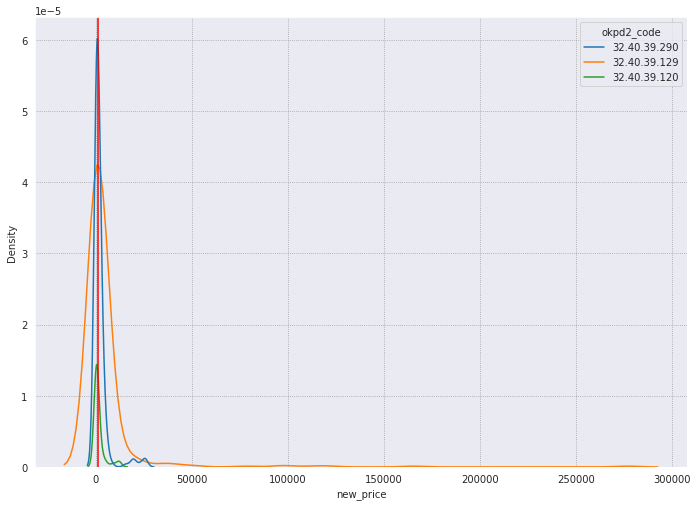

In [13]:
# Вводим инн если знаем,что поставщик есть в определённой категории
inn = '6aca51cb6cc78bb8d09c0d7b2b511b55'
okpd = '32.40.39.129'
draw_analyst(data, inn, okpd)

In [14]:
country = pd.read_csv(PATH+'/counrty/country_directory.csv', sep=';', encoding='UTF-8')

In [15]:
def func(fz_44_2):
    new = fz_44_2.groupby(['okpd2_code', 'country_code'], as_index=False).agg({'inn': 'count'})
    new['country_code'] = new.country_code.apply(lambda x: str(x).split('|'))
    new = new.explode('country_code')
    new.drop_duplicates(inplace=True)
    new = new.reset_index().drop('index', axis=1)

    table = pd.pivot_table(data=new, index='okpd2_code', values='inn', columns='country_code', fill_value=0,
                           aggfunc='sum')
    table.reset_index(inplace=True)

    table_without_okpd = pd.pivot_table(data=new, index='okpd2_code', values='inn', columns='country_code',
                                        fill_value=0, aggfunc='sum')

    pivot = pd.DataFrame(table_without_okpd.sum(axis=0))
    pivot.reset_index(inplace=True)
    pivot['summ'] = pivot[0]
    pivot = pivot.drop([0], axis=1)
    pivot = pivot.astype({'country_code': 'float64'})
    pivot = pivot.merge(country, how='inner', left_on='country_code', right_on='country_iso_code')
    pivot = pivot.drop('country_iso_code', axis=1)
    pivot = pivot.sort_values('summ', ascending=False)
    
    print("Страны с наибольшем количеством позиций")
    
    sns.barplot(x = pivot[pivot['summ'] > top]['summ'], y = pivot[pivot['summ'] > top]['country_name'])

Страны с наибольшем количеством позиций


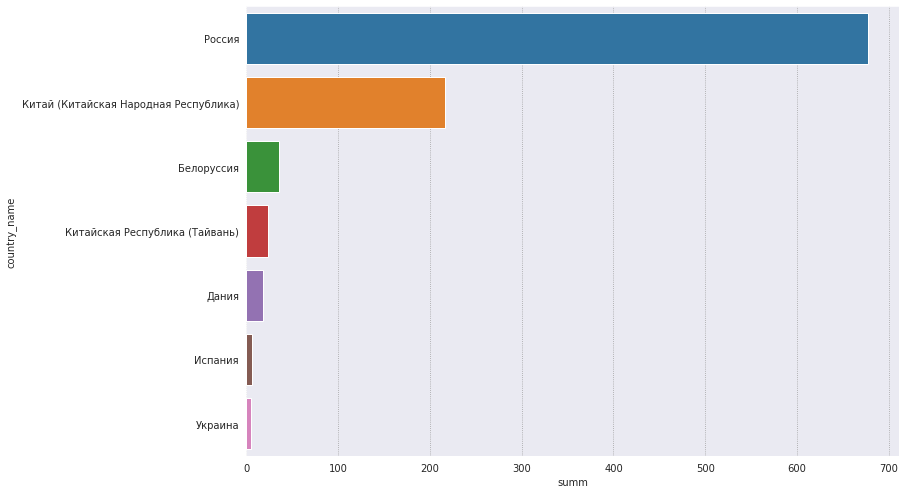

In [16]:
func(data)

In [17]:
def func_2(uniq_okpd_codes_count):
    rcParams['figure.figsize'] = 20, 12

    fig, axes = plt.subplots(len(uniq_okpd_codes_count), 1)
    print(f"Страны с наибольшей конкуренцией с данной категорией товаров")

    for category, ax in zip(uniq_okpd_codes_count.okpd2_code.values, axes):
        new = data.groupby(['okpd2_code', 'country_code'], as_index=False).agg({'inn': 'count'})
        new['country_code'] = new.country_code.apply(lambda x: str(x).split('|'))
        new = new.explode('country_code')
        new.drop_duplicates(inplace=True)
        new = new.reset_index().drop('index', axis=1)

        table = pd.pivot_table(data=new, index='okpd2_code', values='inn', columns='country_code', fill_value=0,
                               aggfunc='sum')
        table.reset_index(inplace=True)

        table_without_okpd = pd.pivot_table(data=new, index='okpd2_code', values='inn', columns='country_code',
                                            fill_value=0, aggfunc='sum')

        help = table_without_okpd[table_without_okpd.sum(axis=1) == table_without_okpd.sum(axis=1)].T

        help = help[help[category] > 0].reset_index()
        help = help.astype({'country_code': 'float64'}).rename({category: 'count'})
        help = help.merge(country, how='inner', left_on='country_code', right_on='country_iso_code')

        sns.barplot(x = help['country_name'], y = help[category], color='coral', ax=ax)

Страны с наибольшей конкуренцией с данной категорией товаров


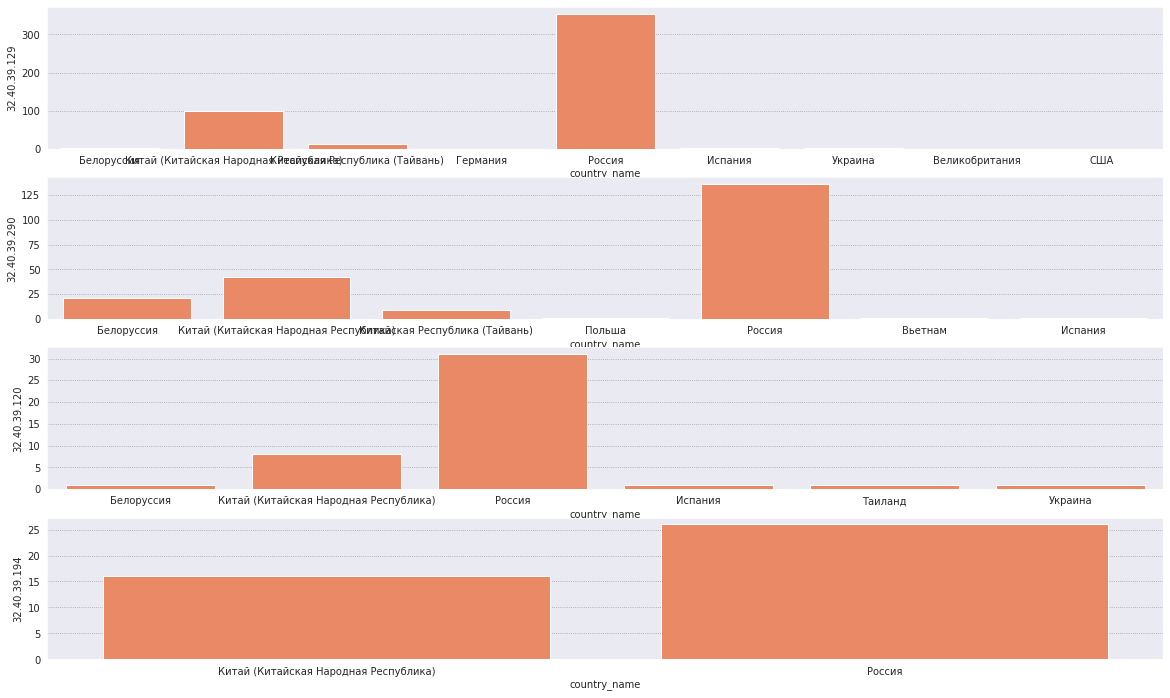

In [18]:
func_2(uniq_okpd_codes_count)

In [19]:
def func_3(category):
    check = data[data.okpd2_code == category][['new_price', 'okpd2_code', 'inn']]
    print("Распределение цен в конкретной категории")
    sns.kdeplot(check['new_price'])

Распределение цен в конкретной категории


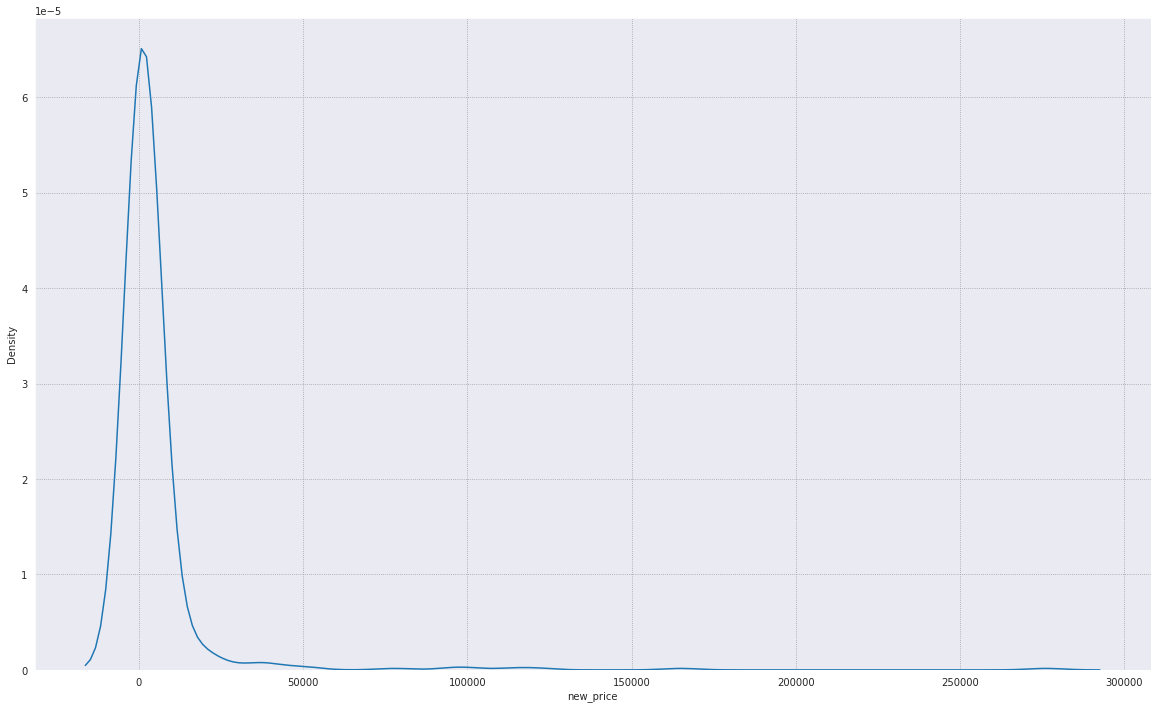

In [20]:
func_3(okpd)


In [21]:
def func_4(category):
    sellers = data[['inn', 'okpd2_code']]
    take = pd.DataFrame(sellers[sellers.okpd2_code == category].inn.value_counts()).reset_index().rename(
        columns={'index': 'inn', 'inn': 'count'})
    take = take.sort_values('count', ascending=False)

    take['percent'] = take['count'] / sum(take['count'])

    print("Количество разных позиций у первых 15 человек в данной категории")
    
    sns.barplot(y=take['inn'].head(15), x=take['count'].head(15))

Количество разных позиций у первых 15 человек в данной категории


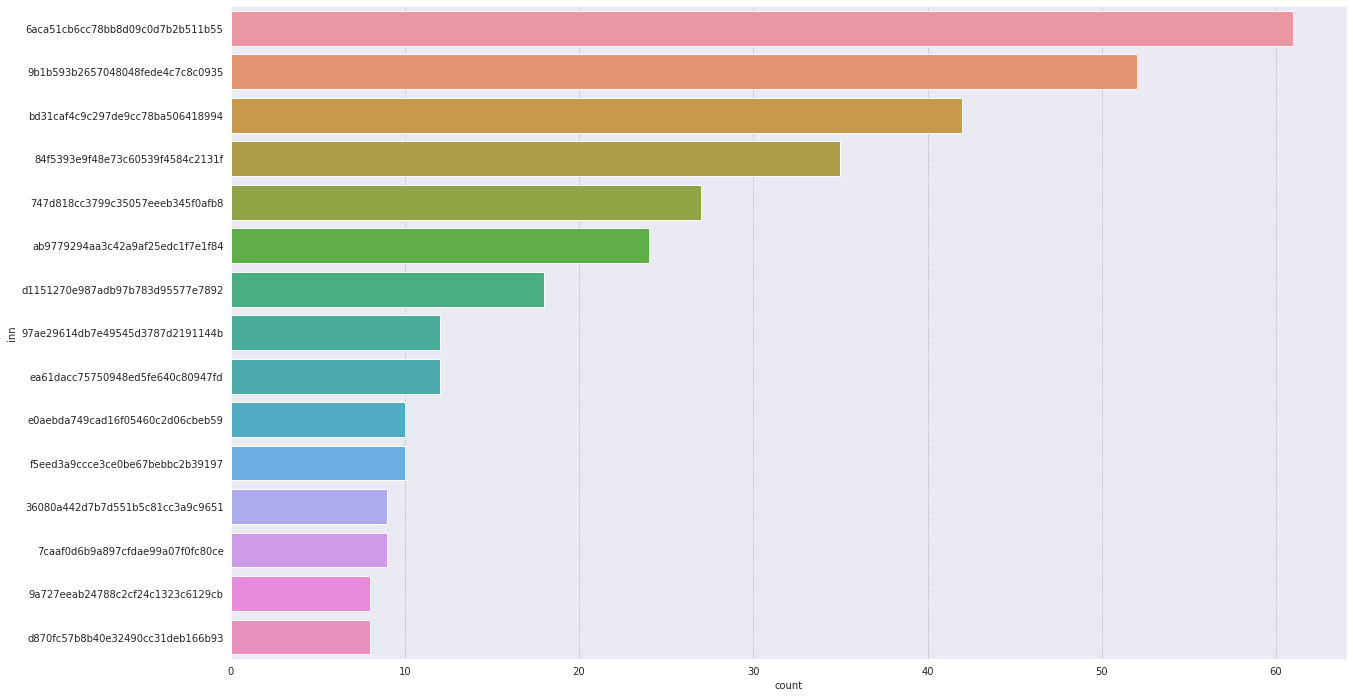

In [22]:
func_4(okpd)